In [1]:
import PIL.Image as Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from data_prep import get_generators
from train import Trainer
import utils

%load_ext autoreload
%autoreload 2

## generator

### parameters

So the first step in this project is familiar `ImageDataGenerator`. Now we import from the different location but this doesn't matter:

- we use only `rescale=1. / 255` as a normalization (again no mean subtraction);
- we use `flow_from_directory`; the directory should contain one subdirectory per class - that's what we have;

In [2]:
!tree -d /Users/ilyarudyak/data/cats_and_dogs_filtered/

/Users/ilyarudyak/data/cats_and_dogs_filtered/
├── train
│   ├── cats
│   └── dogs
└── validation
    ├── cats
    └── dogs

6 directories


In [3]:
!ls ~/data/cats_and_dogs_filtered/train/dogs | head -3

dog.0.jpg
dog.1.jpg
dog.10.jpg


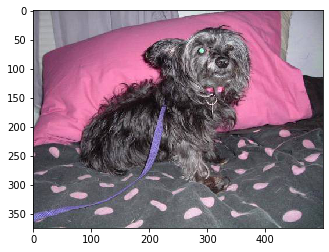

In [4]:
dir_path_train = Path.home() / 'data/cats_and_dogs_filtered/train/'
img = Image.open(dir_path_train / 'dogs/dog.0.jpg')
plt.imshow(img);

In [5]:
img.size

(499, 375)

We also specify the following arguments:
  
- `target`: to resize images to this size - it seems original images are much bigger;
- `class_mode`: `binary`; this means that we have "1D numpy array of binary labels" (not quite clear);

>     Mode for yielding the targets:
    - `"binary"`: 1D numpy array of binary labels,
    - `"categorical"`: 2D numpy array of one-hot encoded labels.
        Supports multi-label output.
    - `"input"`: images identical to input images (mainly used to
        work with autoencoders),
    - `"multi_output"`: list with the values of the different columns,
    - `"raw"`: numpy array of values in `y_col` column(s),
    - `"sparse"`: 1D numpy array of integer labels,

### output

In [7]:
train_data_gen, val_data_gen = get_generators(batch_size=100)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
img_batch, label_batch = next(train_data_gen)

In [9]:
img, label = img_batch[0], label_batch[0]

In [10]:
# the array is in fact normalized
img_arr = np.array(img)
img_arr.shape, img_arr[0, 0]

((150, 150, 3), array([0.5176471, 0.5568628, 0.5921569], dtype=float32))

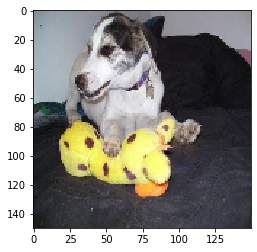

In [11]:
# we may see that the image is indeed resized to 150 px
plt.imshow(img);

In [12]:
# still not quite clear how we represent labels
label_batch, label

(array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.],
       dtype=float32), 1.0)

## model

In [ ]:
trainer = Trainer()

In [ ]:
trainer.model.summary()

## training

In [ ]:
trainer = Trainer()

In [ ]:
experiment_dir = trainer.experiment_dir
filename = experiment_dir / 'history.pickle'

In [ ]:
utils.plot_history(filename)